In [1]:
import squigglepy as sq
import numpy as np

from datetime import datetime
from pprint import pprint

from libs import run_model, calculate_doubling_time, plot_exponential_growth, analyze_agi_arrival
from params import start_task_length, agi_task_length, doubling_time, acceleration, shift


O3_LAUNCH_DATE = datetime(2025, 4, 16)
CLAUDE_3P7_LAUNCH_DATE = datetime(2025, 2, 24)

print('Loaded libraries')

## START task length (displayed in min) ##
{1: 0.02,
 5: 0.02,
 10: 0.02,
 20: 0.03,
 30: 0.07,
 40: 0.15,
 50: 0.32,
 60: 0.66,
 70: 1.38,
 80: 3.27,
 90: 9.7,
 95: 23.67,
 99: 109.7}



## AGI task length (displayed in hrs) ##
{1: 40,
 5: 50,
 10: 79,
 20: 138,
 30: 206,
 40: 292,
 50: 401,
 60: 552,
 70: 779,
 80: 1152,
 90: 1998,
 95: 3149,
 99: 7435}



## DOUBLING TIME (displayed in days) ##
{1: 94,
 5: 118,
 10: 118,
 20: 118,
 30: 135,
 40: 160,
 50: 186,
 60: 212,
 70: 212,
 80: 212,
 90: 222,
 95: 253,
 99: 319}



## ACCELERATION
{1: 0.901,
 5: 0.978,
 10: 1.0,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 95: 1.022,
 99: 1.1}



## SHIFT (displayed in days) ##
{1: 0,
 5: 31,
 10: 57,
 20: 89,
 30: 112,
 40: 132,
 50: 150,
 60: 168,
 70: 188,
 80: 212,
 90: 244,
 95: 271,
 99: 321}
Loaded libraries


In [2]:
def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time, acceleration)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=O3_LAUNCH_DATE, cores=4)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3547.40it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1627.28it/s]


...Collected!
{1: 843,
 5: 1222,
 10: 1474,
 20: 1840,
 30: 2159,
 40: 2458,
 50: 2783,
 60: 3115,
 70: 3513,
 80: 4013,
 90: 4749,
 95: 5410,
 99: 6900}

-

{1: '2027 Aug 07',
 5: '2028 Aug 20',
 10: '2029 Apr 30',
 20: '2030 May 01',
 30: '2031 Mar 16',
 40: '2032 Jan 09',
 50: '2032 Nov 29',
 60: '2033 Oct 26',
 70: '2034 Nov 29',
 80: '2036 Apr 12',
 90: '2038 Apr 17',
 95: '2040 Feb 07',
 99: '2044 Mar 07'}


In [3]:
analyze_agi_arrival(samples)

## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2027.3
2%: 2027.7
3%: 2028.0
4%: 2028.2
5%: 2028.3
10%: 2029.0
15%: 2029.6
20%: 2030.0
25%: 2030.5
35%: 2031.3
50%: 2032.6
60%: 2033.5
75%: 2035.3
80%: 2036.0
90%: 2038.0
95%: 2039.8


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 2.3 years from now
2%: 2.7 years from now
3%: 3.0 years from now
4%: 3.2 years from now
5%: 3.3 years from now
10%: 4.0 years from now
15%: 4.6 years from now
20%: 5.0 years from now
25%: 5.5 years from now
35%: 6.3 years from now
50%: 7.6 years from now
60%: 8.5 years from now
75%: 10.3 years from now
80%: 11.0 years from now
90%: 13.0 years from now
95%: 14.8 years from now
(Mean: 8 years from now)


## AGI ARRIVAL DATE BY BIN ##
2025: 0.1%
2026: 0.5%
2027: 2.7%
2028: 6.5%
2029: 9.9%
2030-2031: 23.5%
2032-2034: 30.0%
2035-2039: 22.3%
2040-2049: 4.5%
2050-2059: 0.1%
2060-2069: 0.0%
2070-2079: 0.0%
2080-2089: 0.0%
2090-2099: 0.0%
>2100: 0.0%


## AGI ARRIVAL DATE BY YEAR ##
By EOY 2025: 0.1%
By EOY 2026: 0.5%
B

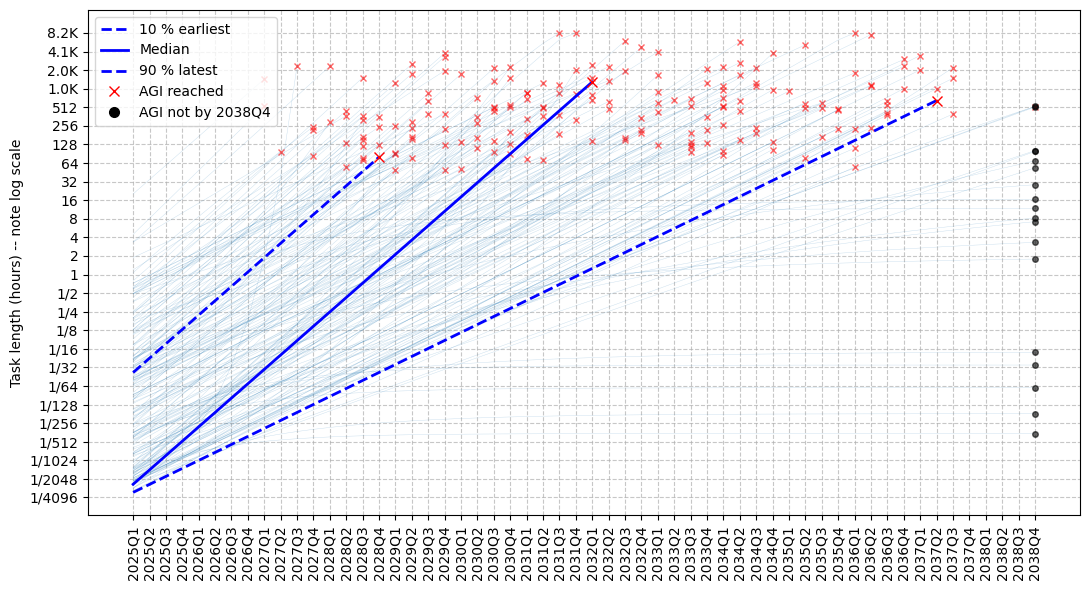

In [5]:
plot_exponential_growth(
    doubling_time_days=doubling_time,
    starting_hours=start_task_length,
    agi_task_length=agi_task_length,
    shift=shift,
    acceleration=acceleration,
    n_quarters=55,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)